In [1]:
# Here we are importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pip install yfinance

In [3]:
# Above we installed yfinance yahoo finance server libraries for working on latest stock market dataset 
# Below I imported that as yf and stored the data in stock_data of amazon for last 5 days and with duration of 5m
import yfinance as yf

# Download 5-minute interval data for the last week
stock_data = yf.download(
    tickers="AMZN",  # Replace with the ticker of the tech stock
    interval="5m",
    period="5d"
)
print(stock_data)


[*********************100%***********************]  1 of 1 completed

Price                           Close        High         Low        Open  \
Ticker                           AMZN        AMZN        AMZN        AMZN   
Datetime                                                                    
2024-12-18 14:30:00+00:00  229.628494  231.080002  229.229996  230.770004   
2024-12-18 14:35:00+00:00  230.059998  230.320007  229.270004  229.600006   
2024-12-18 14:40:00+00:00  230.160004  230.270004  229.619995  230.059906   
2024-12-18 14:45:00+00:00  230.119995  230.160004  229.500000  230.154999   
2024-12-18 14:50:00+00:00  230.259995  230.384995  229.850006  230.080002   
...                               ...         ...         ...         ...   
2024-12-24 17:35:00+00:00  228.690094  228.773407  228.314407  228.360001   
2024-12-24 17:40:00+00:00  228.595001  228.860001  228.580002  228.705002   
2024-12-24 17:45:00+00:00  228.759995  228.770004  228.458694  228.595001   
2024-12-24 17:50:00+00:00  228.904999  228.990005  228.520004  228.759995   

In [55]:
# Since we got our dataset now we are seeing and exploring the dataset
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Datetime,,,,,
2024-12-18 14:30:00+00:00,229.628494,231.080002,229.229996,230.770004,2262596
2024-12-18 14:35:00+00:00,230.059998,230.320007,229.270004,229.600006,444343
2024-12-18 14:40:00+00:00,230.160004,230.270004,229.619995,230.059906,354791
2024-12-18 14:45:00+00:00,230.119995,230.160004,229.500000,230.154999,370078
2024-12-18 14:50:00+00:00,230.259995,230.384995,229.850006,230.080002,290811


In [27]:
# Since we are dealing with stock data we will see its tail
stock_data.tail()

Price,Close,High,Low,Open,Volume,Daily_Returns,Rolling_Volatility
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,,
Datetime,,,,,,,
2024-12-24 17:35:00+00:00,228.690094,228.773407,228.314407,228.360001,196569,NaN,NaN
2024-12-24 17:40:00+00:00,228.595001,228.860001,228.580002,228.705002,184285,NaN,NaN
2024-12-24 17:45:00+00:00,228.759995,228.770004,228.458694,228.595001,148191,NaN,NaN
2024-12-24 17:50:00+00:00,228.904999,228.990005,228.520004,228.759995,329811,NaN,NaN
2024-12-24 17:55:00+00:00,228.899994,229.059998,228.539993,228.902496,822983,NaN,NaN


In [7]:
# Checking to see its missing value
stock_data.isna().sum()

Price   Ticker
Close   AMZN      0
High    AMZN      0
Low     AMZN      0
Open    AMZN      0
Volume  AMZN      0
dtype: int64

In [9]:
# Here we are seeing the shape of the dataset
stock_data.shape

(354, 5)

In [11]:
# Here we are seeing the dataset daigonally for better view
print(stock_data.T)

Datetime       2024-12-18 14:30:00+00:00  2024-12-18 14:35:00+00:00  \
Price  Ticker                                                         
Close  AMZN                 2.296285e+02                 230.059998   
High   AMZN                 2.310800e+02                 230.320007   
Low    AMZN                 2.292300e+02                 229.270004   
Open   AMZN                 2.307700e+02                 229.600006   
Volume AMZN                 2.262596e+06              444343.000000   

Datetime       2024-12-18 14:40:00+00:00  2024-12-18 14:45:00+00:00  \
Price  Ticker                                                         
Close  AMZN                   230.160004                 230.119995   
High   AMZN                   230.270004                 230.160004   
Low    AMZN                   229.619995                 229.500000   
Open   AMZN                   230.059906                 230.154999   
Volume AMZN                354791.000000              370078.000000   

Date

In [13]:
# Here we will use the describe function
stock_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
count,354.000000,354.000000,354.000000,354.000000,3.540000e+02
mean,226.061658,226.350822,225.779790,226.076035,3.494166e+05
std,2.443057,2.385068,2.507441,2.451228,6.909496e+05
min,219.369995,220.000000,218.729996,219.395004,8.411300e+04
25%,224.559998,224.872498,224.292496,224.550579,1.642128e+05
50%,225.404999,225.644249,225.172501,225.416351,2.219605e+05
75%,228.233749,228.519604,228.007572,228.240005,3.339025e+05
max,231.199997,231.399902,231.080002,231.210007,1.166537e+07


## Findings
Count:

There are 354 observations (trading days) in this dataset.
Price Statistics:

Mean: The average closing price is approximately $226.06.
Standard Deviation (std): The prices have a standard deviation of about $2.44, indicating the average deviation from the mean price.
Minimum: The lowest closing price recorded is $219.37.
Maximum: The highest closing price recorded is $231.20.
Percentiles:

25th Percentile (Q1): 25% of the closing prices are below $224.56.
50th Percentile (Median): The median closing price is $225.40, meaning half of the closing prices are below this value.
75th Percentile (Q3): 75% of the closing prices are below $228.23.
High, Low, Open Prices:

The high, low, and open prices follow a similar pattern to the closing prices, with their respective means, standard deviations, and ranges provided.
The average high price is approximately $225.78, while the average low price is around $226.08.
Volume:

The average trading volume is approximately 349,416 shares, with a maximum volume of over 11.6 million shares, indicating significant trading activity on certain days.
Insights
The relatively low standard deviation compared to the mean price suggests that the stock price has been relatively stable over the observed period.
The range between the minimum and maximum closing prices indicates some volatility, but the overall mean and median values suggest that the stock has maintained a consistent price level.
The trading volume data indicates that there are days with significantly higher trading activity, which could correlate with news events or earnings reports.


<Axes: xlabel='Price-Ticker'>

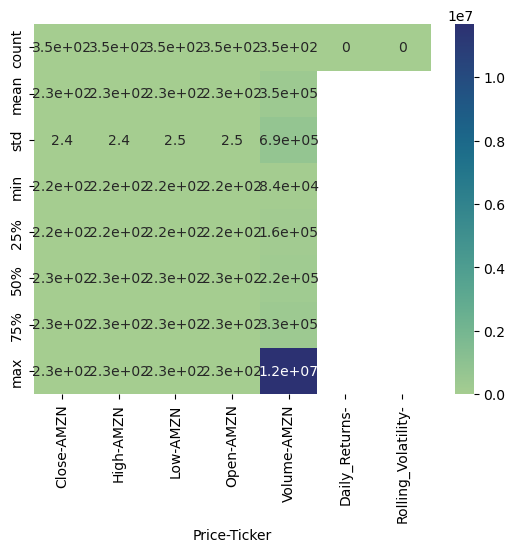

In [29]:
# Visualization of Dataset now using heatmap with describe function
sns.heatmap(stock_data.describe(),cmap="crest",annot=True)

In [31]:
# Here I am using pct change to see wether my dataset is proper or not for further study
if 'Close' in stock_data.columns:
    # Calculate daily returns
    stock_data['Daily_Returns'] = stock_data['Close'].pct_change()
else:
    print("Column 'Close' does not exist in the DataFrame.")

# Display the DataFrame
print(stock_data)

Price                           Close        High         Low        Open  \
Ticker                           AMZN        AMZN        AMZN        AMZN   
Datetime                                                                    
2024-12-18 14:30:00+00:00  229.628494  231.080002  229.229996  230.770004   
2024-12-18 14:35:00+00:00  230.059998  230.320007  229.270004  229.600006   
2024-12-18 14:40:00+00:00  230.160004  230.270004  229.619995  230.059906   
2024-12-18 14:45:00+00:00  230.119995  230.160004  229.500000  230.154999   
2024-12-18 14:50:00+00:00  230.259995  230.384995  229.850006  230.080002   
...                               ...         ...         ...         ...   
2024-12-24 17:35:00+00:00  228.690094  228.773407  228.314407  228.360001   
2024-12-24 17:40:00+00:00  228.595001  228.860001  228.580002  228.705002   
2024-12-24 17:45:00+00:00  228.759995  228.770004  228.458694  228.595001   
2024-12-24 17:50:00+00:00  228.904999  228.990005  228.520004  228.759995   

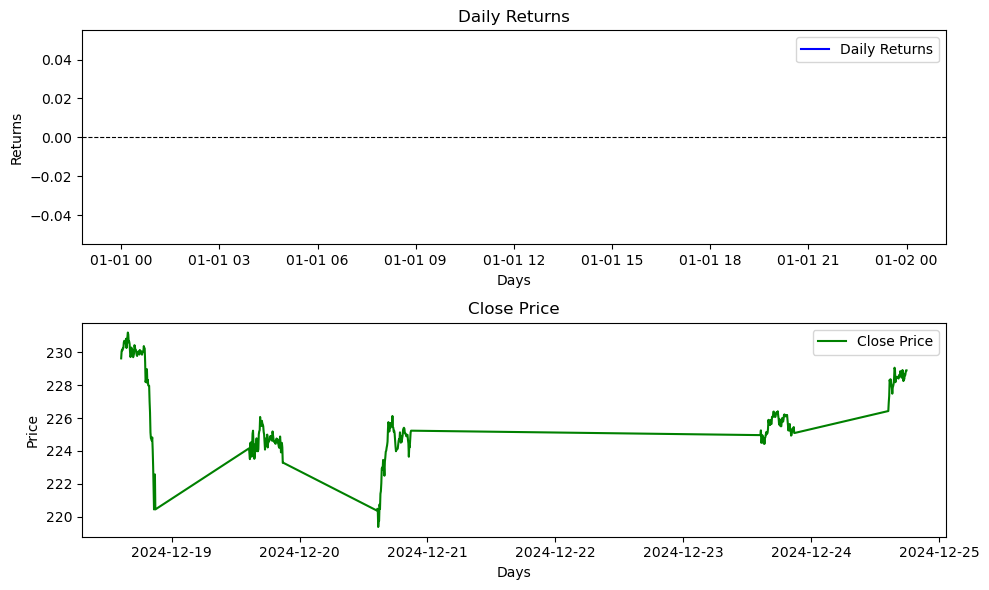

In [19]:
# 1. Calculate Daily Returns
stock_data['Daily_Returns'] = stock_data['Close'].pct_change()

# 2. Calculate Rolling Volatility (Standard Deviation)
window_size = 5  # Use a 5-day rolling window for volatility
stock_data['Rolling_Volatility'] = stock_data['Daily_Returns'].rolling(window=window_size).std()

# Calculate daily returns
stock_data['Daily_Returns'] = stock_data['Close'].pct_change()

# Plotting
plt.figure(figsize=(10, 6))

# Plot Daily Returns
plt.subplot(2, 1, 1)
plt.plot(stock_data['Daily_Returns'], label='Daily Returns', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.title('Daily Returns')
plt.xlabel('Days')
plt.ylabel('Returns')
plt.legend()

# Optionally, you can plot the closing prices as well
plt.subplot(2, 1, 2)
plt.plot(stock_data['Close'], label='Close Price', color='green')
plt.title('Close Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

#Findings
1. Daily Returns Plot
Y-axis: The "Returns" axis represents the daily percentage change in stock price.
X-axis: The "Days" axis displays time on an hourly scale (e.g., 01-01 00, 01-01 03, etc.), suggesting that the data is intraday rather than end-of-day for a specific date range.
Observation:
The daily returns fluctuate very closely around zero, with a maximum return slightly above 0.04 and a minimum slightly below -0.04.
This suggests low volatility in daily percentage changes during this time period.
Insight: Such low volatility could indicate that the stock price remained relatively stable over the observed period. This stability could be typical of large-cap stocks like Amazon, depending on market condit2. Close Price Plot
Y-axis: The "Price" axis represents the stock's closing price in dollars.
X-axis: The time is displayed in hours (same as the Daily Returns plot), showing intraday price changes.
Observation:
The stock price fluctuates between approximately $224 and $230.
There are sharp movements (spikes and drops), but the price stabilizes for certain periods before increasing again towards the end.
These changes may represent market reactions to events (e.g., earnings announcements, news, or investor sentiment).
Insight:
The stock price exhibits slight upward movement toward the end of the chart.
The sharp drops and recovery suggest some level of market activity or external factors influencing the price.
Overall Analysis:
Daily Returns and Close Price Relationship: The low volatility in daily returns corresponds to relatively stable stock prices, but the spikes in the closing price indicate some abrupt changes.
Time Frame: The data is intraday (likely a single day or two) and focuses on short-term movements rather than long-term trends.
Key Takeaway: Amazon's stock during this time period demonstrates overall stability with minor spikes, which might reflect market micro-movements or external news. Further analysis of the causes behind these spikes could be useful.ions.
